In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
import matplotlib as mpl
import qgrid
import pickle

In [2]:
# mpl.rcParams['font.family'] = 'Avenir'
plt.rc('font', family='Helvetica')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sns.set_palette("Dark2")

In [3]:
drug_score = pd.read_csv("../../data/drug/final_drug_scores_eg_id.tsv", sep="\t")
drug_list = drug_score[
    (drug_score['MultiDrug_correlation'] > 0.4) & (drug_score['sensitive_count'] > 20)][
    'drug_id'].values
drug_list_sensitive = drug_score[(drug_score['sensitive_count'] > 20)][
    'drug_id'].values

In [4]:
colour_list = pd.read_csv('../../data/colour_list.txt',header=None)[0].tolist()

# overall

In [8]:
lm_res = pd.read_csv("../../result_files/lm/lm_sklearn_degr_drug_annotated.csv.gz")
lm_res = lm_res[lm_res['fdr']<0.1].sort_values(by=['fdr']).reset_index(drop=True)

## PPI

In [16]:
df = {'Top N':[],'T':[], '1':[],'2':[],'3':[],'4':[],'5+':[],'-':[]}
for i in [10, 50, 100, 500, 1000,5000]:
    tmp = lm_res.dropna(subset=['ppi']).head(i).groupby('ppi').size() / i
    tmp_n = 0
    df['Top N'].append(i)
    for k in df.keys():
        if k == 'Top N':
            continue
        if k in tmp:
            df[k].append(tmp[k] + tmp_n)
            tmp_n += tmp[k]
        else:
            df[k].append(0+tmp_n)
df = pd.DataFrame(df)

In [17]:
df_long = pd.melt(df, id_vars=['Top N'], value_name='percentage', var_name='PPI distance')

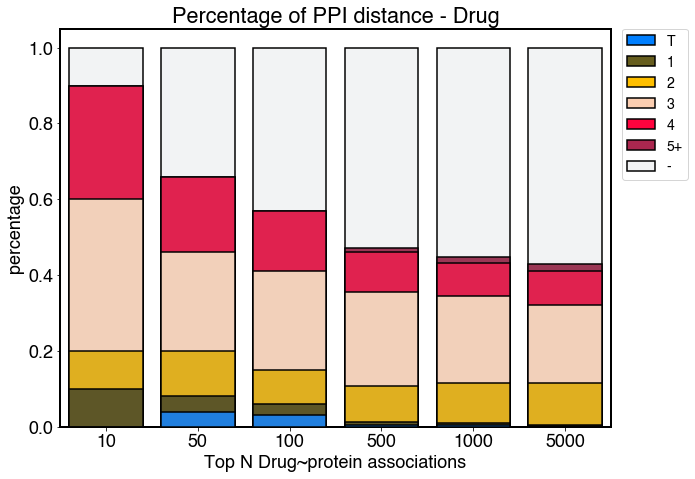

In [18]:
g1 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='T'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[0], zorder=10)
g2 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='1'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[1], zorder=9)
g3 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='2'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[2], zorder=8)
g4 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='3'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[3], zorder=7)
g5 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='4'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[4], zorder=6)
g6 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='5+'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[5], zorder=5)
g7 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='-'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[6], zorder=4)
plt.title("Percentage of PPI distance - Drug")
plt.xlabel("Top N Drug~protein associations")

g1_patch = mpatches.Patch(facecolor=colour_list[0], label='T', edgecolor='black',linewidth=1.5)
g2_patch = mpatches.Patch(facecolor=colour_list[1], label='1', edgecolor='black',linewidth=1.5)
g3_patch = mpatches.Patch(facecolor=colour_list[2], label='2', edgecolor='black',linewidth=1.5)
g4_patch = mpatches.Patch(facecolor=colour_list[3], label='3', edgecolor='black',linewidth=1.5)
g5_patch = mpatches.Patch(facecolor=colour_list[4], label='4', edgecolor='black',linewidth=1.5)
g6_patch = mpatches.Patch(facecolor=colour_list[5], label='5+', edgecolor='black',linewidth=1.5)
g7_patch = mpatches.Patch(facecolor=colour_list[6], label='-', edgecolor='black',linewidth=1.5)


plt.legend(handles=[g1_patch, g2_patch, g3_patch,g4_patch,g5_patch,g6_patch,g7_patch],bbox_to_anchor=(1.02, 1),
               loc=2,
               borderaxespad=0.,
               prop={'size': 14})
plt.tight_layout()
# plt.savefig("../../plots/drug/top_associations_by_PPI.pdf", dpi=500)

In [19]:
df_long

,Top N,PPI distance,percentage
0,10,T,0.0000
1,50,T,0.0400
2,100,T,0.0300
3,500,T,0.0060
4,1000,T,0.0040
5,5000,T,0.0010
6,10,1,0.1000
7,50,1,0.0800
8,100,1,0.0600
9,500,1,0.0120


## PPI NC

In [20]:
lm_res = pd.read_csv("../../result_files/lm/lm_sklearn_degr_drug_annotated.csv.gz")
lm_res = lm_res[lm_res['nc_fdr']<0.1].sort_values(by=['nc_fdr']).reset_index(drop=True)

In [21]:
df = {'Top N':[],'T':[], '1':[],'2':[],'3':[],'4':[],'5+':[],'-':[]}
for i in [10, 50, 100, 500, 1000,5000]:
    tmp = lm_res.dropna(subset=['ppi']).head(i).groupby('ppi').size() / i
    tmp_n = 0
    df['Top N'].append(i)
    for k in df.keys():
        if k == 'Top N':
            continue
        if k in tmp:
            df[k].append(tmp[k] + tmp_n)
            tmp_n += tmp[k]
        else:
            df[k].append(0+tmp_n)
df = pd.DataFrame(df)

In [22]:
df_long = pd.melt(df, id_vars=['Top N'], value_name='percentage', var_name='PPI distance')

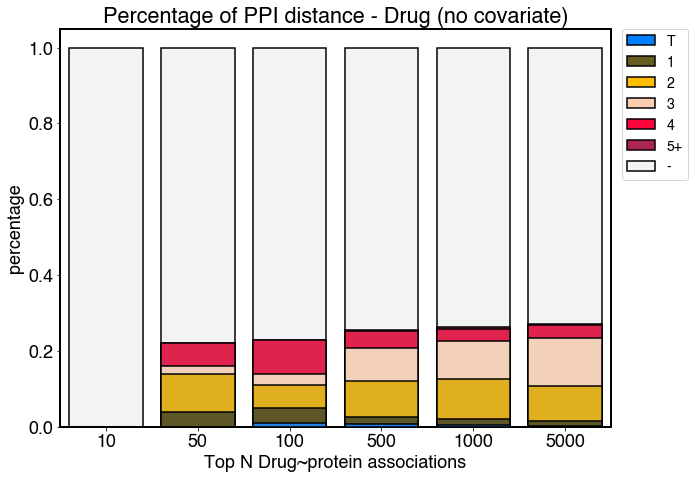

In [23]:
g1 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='T'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[0], zorder=10)
g2 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='1'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[1], zorder=9)
g3 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='2'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[2], zorder=8)
g4 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='3'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[3], zorder=7)
g5 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='4'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[4], zorder=6)
g6 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='5+'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[5], zorder=5)
g7 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='-'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[6], zorder=4)
plt.title("Percentage of PPI distance - Drug (no covariate)")
plt.xlabel("Top N Drug~protein associations")

g1_patch = mpatches.Patch(facecolor=colour_list[0], label='T', edgecolor='black',linewidth=1.5)
g2_patch = mpatches.Patch(facecolor=colour_list[1], label='1', edgecolor='black',linewidth=1.5)
g3_patch = mpatches.Patch(facecolor=colour_list[2], label='2', edgecolor='black',linewidth=1.5)
g4_patch = mpatches.Patch(facecolor=colour_list[3], label='3', edgecolor='black',linewidth=1.5)
g5_patch = mpatches.Patch(facecolor=colour_list[4], label='4', edgecolor='black',linewidth=1.5)
g6_patch = mpatches.Patch(facecolor=colour_list[5], label='5+', edgecolor='black',linewidth=1.5)
g7_patch = mpatches.Patch(facecolor=colour_list[6], label='-', edgecolor='black',linewidth=1.5)


plt.legend(handles=[g1_patch, g2_patch, g3_patch,g4_patch,g5_patch,g6_patch,g7_patch],bbox_to_anchor=(1.02, 1),
               loc=2,
               borderaxespad=0.,
               prop={'size': 14})
plt.tight_layout()
# plt.savefig("../../plots/drug/top_associations_by_PPI.pdf", dpi=500)

## analysis

In [25]:
lm_res = pd.read_csv("../../result_files/lm/lm_sklearn_degr_drug_annotated.csv.gz")
lm_res = lm_res[lm_res['fdr']<0.1].sort_values(by=['fdr']).reset_index(drop=True)

In [77]:
lm_res_phil = lm_res[(lm_res['beta'] < 0) & (lm_res['r2'] > 0.4) & (lm_res['skew'] < 0)]

In [78]:
lm_res_phil['drug_name'] = lm_res_phil['y_id'].map(lambda x:x.split(";")[1])

<ipython-input-78-7b95b4c694a5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
lm_res_phil.to_csv("../../result_files/top_drug_associations.csv", index=False)

In [24]:
protein_list_phil = [
    'AAK1', 'GAK', 'DNM1', 'DNM2', 'SH3GL3',
    'SH3GL1', 'SH3GL2', 'BIN2', 'AMPH'
]

In [25]:
qgrid.show_grid(lm_res_phil[lm_res_phil['x_id'].isin(protein_list_phil)])

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## tissue

In [72]:
res_tissue = pickle.load(open("../../data/correlation/res_tissue_level.pkl", "rb"))

In [73]:
res_tissue['tissue_association'] = res_tissue.apply(
    lambda row: 'Yes' if (row['pearson_pval']) and (row['pearson_pval'] < 0.1) and
    (abs(row['pearson_correlation']) > 0.2) else 'Unsure'
    if (row['pearson_pval']) and (row['count']) < 30 else 'No',
    axis=1)

In [81]:
res_tissue_short = res_tissue[['drug_id', 'gene', 'tissue', 'tissue_association']]

In [82]:
res_tissue_short.columns = ['y_id', 'x_id', 'tissue', 'tissue_association']

In [125]:
lm_res_phil_short = lm_res_phil[[
    'y_id', 'x_id', 'drug_name', 'beta', 'fdr', 'target', 'ppi', 'chr', 'skew', 'r2'
]]

In [126]:
lm_res_phil_tissue = pd.merge(lm_res_phil_short,
                              res_tissue_short,
                              on=['y_id', 'x_id'])

In [127]:
lm_res_phil_tissue_wide = pd.merge(
    lm_res_phil_short,
    pd.pivot(lm_res_phil_tissue.drop_duplicates(['y_id', 'x_id', 'tissue']),
             index=['y_id', 'x_id'],
             columns='tissue',
             values='tissue_association').fillna("No").reset_index(),
    on=['y_id', 'x_id'])

In [130]:
lm_res_phil_tissue_wide.to_csv("../../result_files/top_drug_associations_tissue.csv", index=False)

## top markers

In [104]:
qgrid.show_grid(lm_res.query('r2 > 0.65 and skew < -1.5'))

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## violin plots

In [60]:
ml_score_df = lm_res.drop_duplicates(['y_id'])[['y_id', 'r2']].reset_index(drop=True)
ml_score_df['category'] = 'Predictability'
skew_score_df = lm_res.drop_duplicates(['y_id'])[['y_id', 'skew']].reset_index(drop=True)
skew_score_df['category'] = 'Selectivity'
skew_score_df['skew'] = -1*skew_score_df['skew']

In [100]:
def plot_violin(drug_id):
    fig, ax = plt.subplots(1, 2, figsize=(12, 10))
    sns.violinplot(x='category',
                   y='r2',
                   data=ml_score_df,
                   color='deepskyblue',
                   ax=ax[0])
    score = ml_score_df[ml_score_df['y_id'] == drug_id]['r2'].values[0]
    ax[0].plot((-0.5, 0.5), (score, score), '--', linewidth=2, color='black')
    ax[0].set_title("Predictability")

    sns.violinplot(x='category',
                   y='skew',
                   data=skew_score_df,
                   color='mediumseagreen',
                   ax=ax[1])
    score = skew_score_df[skew_score_df['y_id'] == drug_id]['skew'].values[0]
    ax[1].plot((-0.5, 0.5), (score, score), '--', linewidth=2, color='black')
    ax[1].set_title("Selectivity")
    
    ax[0].set_ylabel("")
    ax[1].set_ylabel("")
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
#     ax[0].set_yticks([])
#     ax[1].set_yticks([])
#     ax[0].set_xticks([])
#     ax[1].set_xticks([])

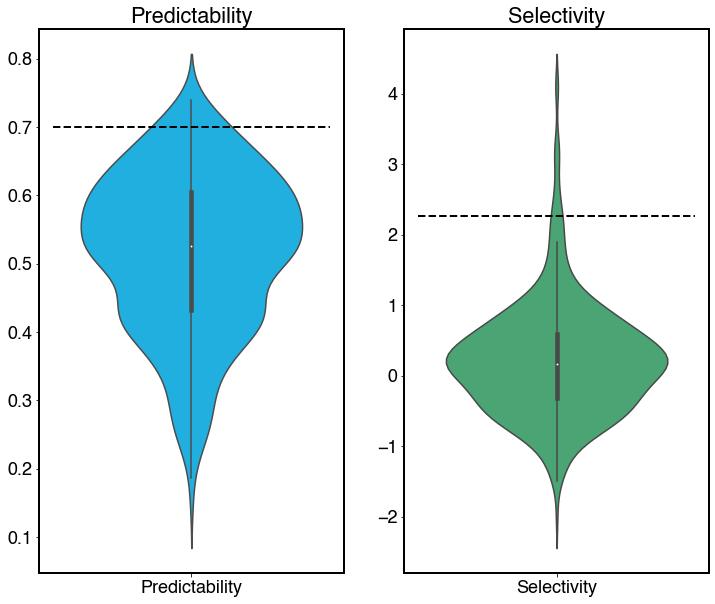

In [101]:
plot_violin('427;Ara-G;GDSC1')

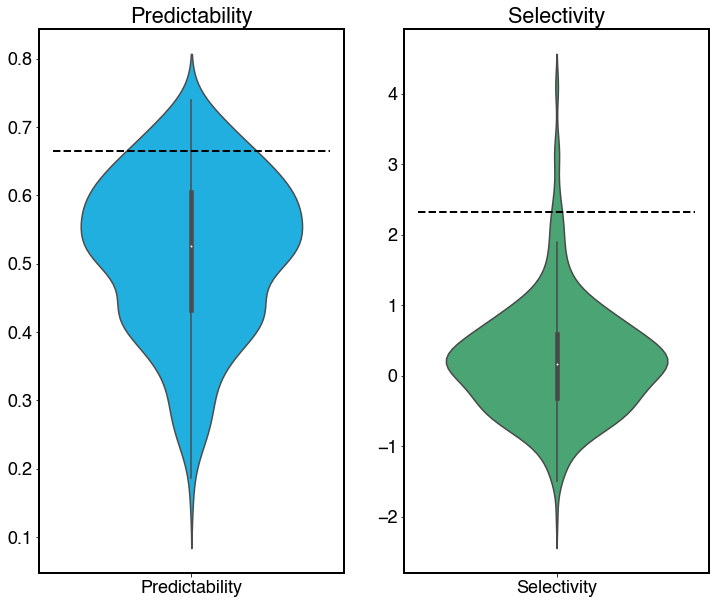

In [105]:
plot_violin('2024;KIT_5808;GDSC2')

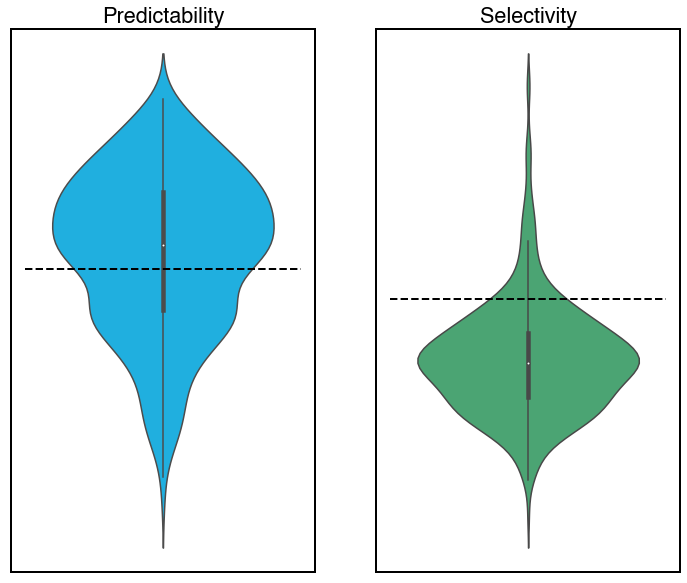

In [96]:
plot_violin('1427;AZD5582;GDSC1')

In [15]:
skew_ml_score_df_long = pd.melt(skew_ml_score_df, id_vars='y_id', value_name='category')

In [ ]:
sns.violinplot(,data=skew_ml_score_df)

# per tissue

In [58]:
lm_res = pd.read_csv("../../result_files/lm/lm_sklearn_degr_drug_per_tissue_annotated.csv.gz")
# lm_res = lm_res[lm_res['fdr']<0.1]

In [59]:
lm_res[lm_res['fdr']<0.1].groupby(['tissue']).size()

tissue
Bone                           13132
Breast                          8021
Central Nervous System          3972
Esophagus                      29584
Haematopoietic and Lymphoid      650
Head and Neck                  12106
Kidney                         17213
Large Intestine                 6389
Lung                             117
Ovary                           9816
Pancreas                       25767
Peripheral Nervous System      34615
Skin                            3296
Stomach                        26648
dtype: int64

In [60]:
lm_res[(lm_res['y_id']=='1936;Savolitinib;GDSC2')]

,y_id,x_id,n,beta,lr,covs,pval,fdr,target,ppi,chr,chr_pos,tissue,attenuated,skew,r2


In [12]:
lm_res[(lm_res['y_id']=='1373;Dabrafenib;GDSC2')&(lm_res['x_id']=='DBNL')]

,y_id,x_id,n,beta,lr,covs,pval,fdr,target,ppi,chr,chr_pos,tissue,attenuated,skew,r2


In [16]:
lm_res[(lm_res['y_id']=='1909;Venetoclax;GDSC2')&(lm_res['x_id']=='TSNAX')]

,y_id,x_id,n,beta,lr,covs,pval,fdr,target,ppi,chr,chr_pos,tissue,attenuated,skew,r2
19593,1909;Venetoclax;GDSC2,TSNAX,22,2.489709,939.796400,20,2.191628e-206,4.138525e-204,BCL2,3,1,231547532.5,Stomach,1,-1.56284,0.740261
1023617,1909;Venetoclax;GDSC2,TSNAX,46,1.133458,17.798455,19,2.455825e-05,2.625844e-03,BCL2,3,1,231547532.5,Central Nervous System,1,-1.56284,0.740261


In [27]:
lm_res[(lm_res['y_id']=='1427;AZD5582;GDSC1')&(lm_res['x_id']=='INCENP')]

,y_id,x_id,n,beta,lr,covs,pval,fdr,target,ppi,chr,chr_pos,tissue,attenuated,skew,r2
881627,1427;AZD5582;GDSC1,INCENP,34,-3.26289,16.990238,19,0.000038,0.001453,BIRC2;BIRC3;XIAP,-,11,62138583.5,Breast,0,-1.084352,0.491294


# CRISPR

In [26]:
lm_crispr = pd.read_csv("../../result_files/lm/lm_sklearn_degr_crispr_annotated.csv.gz")

## PPI

In [27]:
lm_crispr_s = lm_crispr[lm_crispr['fdr'] < 0.1].sort_values(by=['fdr']).reset_index(drop=True)

In [28]:
df = {'Top N':[],'T':[], '1':[],'2':[],'3':[],'4':[],'5+':[],'-':[]}
for i in [10, 50, 100, 500, 1000,5000]:
    tmp = lm_crispr_s.dropna(subset=['ppi']).head(i).groupby('ppi').size() / i
    tmp_n = 0
    df['Top N'].append(i)
    for k in df.keys():
        if k == 'Top N':
            continue
        if k in tmp:
            df[k].append(tmp[k] + tmp_n)
            tmp_n += tmp[k]
        else:
            df[k].append(0+tmp_n)
df = pd.DataFrame(df)

In [29]:
df_long = pd.melt(df, id_vars=['Top N'], value_name='percentage', var_name='PPI distance')

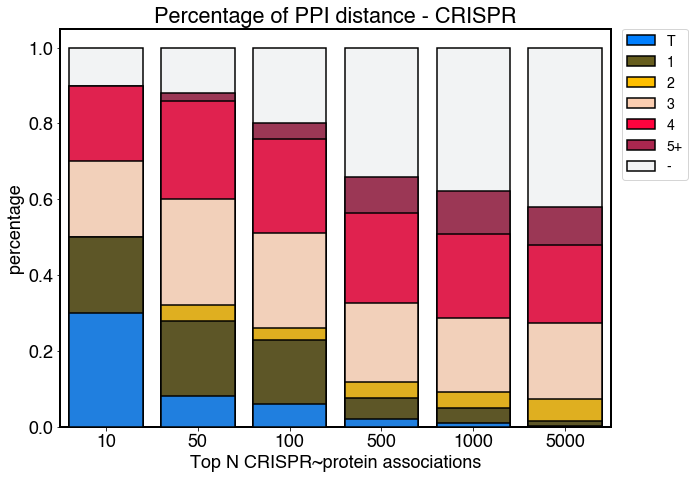

In [30]:
g1 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='T'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[0], zorder=10)
g2 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='1'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[1], zorder=9)
g3 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='2'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[2], zorder=8)
g4 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='3'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[3], zorder=7)
g5 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='4'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[4], zorder=6)
g6 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='5+'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[5], zorder=5)
g7 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='-'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[6], zorder=4)
plt.title("Percentage of PPI distance - CRISPR")
plt.xlabel("Top N CRISPR~protein associations")

g1_patch = mpatches.Patch(facecolor=colour_list[0], label='T', edgecolor='black',linewidth=1.5)
g2_patch = mpatches.Patch(facecolor=colour_list[1], label='1', edgecolor='black',linewidth=1.5)
g3_patch = mpatches.Patch(facecolor=colour_list[2], label='2', edgecolor='black',linewidth=1.5)
g4_patch = mpatches.Patch(facecolor=colour_list[3], label='3', edgecolor='black',linewidth=1.5)
g5_patch = mpatches.Patch(facecolor=colour_list[4], label='4', edgecolor='black',linewidth=1.5)
g6_patch = mpatches.Patch(facecolor=colour_list[5], label='5+', edgecolor='black',linewidth=1.5)
g7_patch = mpatches.Patch(facecolor=colour_list[6], label='-', edgecolor='black',linewidth=1.5)


plt.legend(handles=[g1_patch, g2_patch, g3_patch,g4_patch,g5_patch,g6_patch,g7_patch],bbox_to_anchor=(1.02, 1),
               loc=2,
               borderaxespad=0.,
               prop={'size': 14})
plt.tight_layout()
# plt.savefig("../../plots/crispr/top_associations_by_PPI_CRISPR.pdf", dpi=500)

## PPI no cov

In [36]:
lm_crispr_s = lm_crispr[lm_crispr['nc_fdr'] < 0.1].sort_values(by=['nc_fdr']).reset_index(drop=True)

In [37]:
df = {'Top N':[],'T':[], '1':[],'2':[],'3':[],'4':[],'5+':[],'-':[]}
for i in [10, 50, 100, 500, 1000,5000]:
    tmp = lm_crispr_s.dropna(subset=['ppi']).head(i).groupby('ppi').size() / i
    tmp_n = 0
    df['Top N'].append(i)
    for k in df.keys():
        if k == 'Top N':
            continue
        if k in tmp:
            df[k].append(tmp[k] + tmp_n)
            tmp_n += tmp[k]
        else:
            df[k].append(0+tmp_n)
df = pd.DataFrame(df)

In [38]:
df_long = pd.melt(df, id_vars=['Top N'], value_name='percentage', var_name='PPI distance')

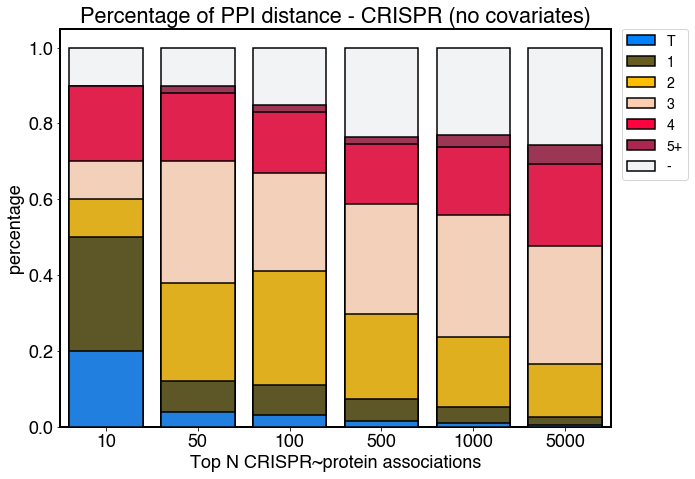

In [39]:
g1 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='T'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[0], zorder=10)
g2 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='1'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[1], zorder=9)
g3 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='2'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[2], zorder=8)
g4 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='3'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[3], zorder=7)
g5 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='4'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[4], zorder=6)
g6 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='5+'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[5], zorder=5)
g7 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='-'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[6], zorder=4)
plt.title("Percentage of PPI distance - CRISPR (no covariates)")
plt.xlabel("Top N CRISPR~protein associations")

g1_patch = mpatches.Patch(facecolor=colour_list[0], label='T', edgecolor='black',linewidth=1.5)
g2_patch = mpatches.Patch(facecolor=colour_list[1], label='1', edgecolor='black',linewidth=1.5)
g3_patch = mpatches.Patch(facecolor=colour_list[2], label='2', edgecolor='black',linewidth=1.5)
g4_patch = mpatches.Patch(facecolor=colour_list[3], label='3', edgecolor='black',linewidth=1.5)
g5_patch = mpatches.Patch(facecolor=colour_list[4], label='4', edgecolor='black',linewidth=1.5)
g6_patch = mpatches.Patch(facecolor=colour_list[5], label='5+', edgecolor='black',linewidth=1.5)
g7_patch = mpatches.Patch(facecolor=colour_list[6], label='-', edgecolor='black',linewidth=1.5)


plt.legend(handles=[g1_patch, g2_patch, g3_patch,g4_patch,g5_patch,g6_patch,g7_patch],bbox_to_anchor=(1.02, 1),
               loc=2,
               borderaxespad=0.,
               prop={'size': 14})
plt.tight_layout()
# plt.savefig("../../plots/crispr/top_associations_by_PPI_CRISPR.pdf", dpi=500)

# CRISPR + Drug

In [42]:
lm_crispr.query('y_id == "PRKAR1A"')

,y_id,x_id,n,beta,lr,covs,pval,fdr,nc_beta,nc_lr,nc_pval,nc_fdr,r2,ppi,skew
17,PRKAR1A,PRKAR1A,489,-0.152380,3.880171e+01,21,4.691169e-10,0.000008,-0.253764,118.031369,1.706674e-27,2.871821e-23,0.670137,T,-0.82335
2761,PRKAR1A,MRPS26,496,0.205234,2.018679e+01,21,7.023624e-06,0.059093,0.324745,42.338142,7.678045e-11,1.291985e-06,0.670137,3,-0.82335
4419,PRKAR1A,SAAL1,145,-0.295730,1.912237e+01,21,1.225996e-05,0.078586,-0.243346,11.220915,8.088060e-04,5.946942e-01,0.670137,-,-0.82335
4953,PRKAR1A,EMD,499,-0.204181,1.873992e+01,21,1.498130e-05,0.084030,-0.245724,57.115281,4.109997e-14,3.457946e-10,0.670137,3,-0.82335
6763,PRKAR1A,PGRMC1,499,-0.178699,1.785769e+01,21,2.380556e-05,0.100144,-0.180380,39.524153,3.240269e-10,5.452400e-06,0.670137,3,-0.82335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699330,PRKAR1A,DDX1,500,-0.000043,1.305879e-06,21,9.990882e-01,0.999925,-0.037024,0.957763,3.277512e-01,8.034030e-01,0.670137,4,-0.82335
49712929,PRKAR1A,RPRD1A,392,-0.032531,1.422104e+00,21,2.330574e-01,0.999925,-0.006061,0.040971,8.395936e-01,9.957779e-01,0.670137,3,-0.82335
49728924,PRKAR1A,ELP1,328,0.001177,1.343594e-03,21,9.707600e-01,0.999938,-0.051381,2.038651,1.533456e-01,9.994712e-01,0.670137,-,-0.82335
49748301,PRKAR1A,TGOLN2,491,0.000002,3.482455e-09,21,9.999529e-01,0.999953,-0.062586,4.960584,2.593145e-02,4.541392e-01,0.670137,2,-0.82335


In [81]:
lm_res = pd.read_csv(
    "../../result_files/lm/lm_sklearn_degr_drug_annotated.csv.gz")
lm_res = lm_res[(lm_res['fdr'] < 0.1)|(lm_res['nc_fdr'] < 0.001)]

In [44]:
lm_res.query('ppi == "T"')

,y_id,x_id,n,beta,lr,covs,pval,fdr,nc_beta,nc_lr,nc_pval,nc_fdr,r2,target,ppi,skew
10,1958;Merestinib;GDSC2,MET,527,-0.512602,48.015989,22,4.227577e-12,1.251363e-08,-0.453378,46.865382,7.603397e-12,2.250606e-08,0.394103,MET;MST1R,T,-1.143132
18,1936;Savolitinib;GDSC2,MET,664,-0.419684,45.210970,22,1.769113e-11,5.236575e-08,-0.363764,41.982289,9.210387e-11,2.169756e-07,0.657922,MET,T,-1.306811
62,1403;AZD6094;GDSC1,MET,637,-0.337195,38.709974,22,4.916902e-10,7.277016e-07,-0.362232,54.840322,1.307309e-13,3.869636e-10,0.424649,MET,T,-4.084074
813,2040;Foretinib;GDSC2,MET,659,-0.328689,29.318785,22,6.139761e-08,1.817369e-04,-0.228652,16.499860,4.865367e-05,1.007695e-02,0.543382,EGFR;FGFR1;FLT4;KDR;MET;MST1R;PDGFRA;PDGFRB;RO...,T,-0.183719
2598,1954;ASLAN002;GDSC2,MET,527,-0.285546,21.985421,22,2.747294e-06,1.161713e-03,-0.204274,13.641089,2.212891e-04,7.987995e-03,0.641873,MET;AXL;MST1R;TYRO3,T,-0.196571
5307,2047;Ulixertinib;GDSC2,MAPK3,617,0.314438,17.307499,22,3.179297e-05,3.720449e-03,0.239765,9.774639,1.769354e-03,1.591881e-02,0.363075,MAPK1;MAPK3,T,-0.135157
6180,275;I-BET-762;GDSC1,BRD4,824,0.350964,20.627068,22,5.580158e-06,4.748178e-03,0.259078,11.687155,6.293305e-04,1.070585e-02,0.620601,BRD2;BRD3;BRD4,T,-0.534887
8069,1850;Tepotinib;GDSC2,MET,653,-0.326906,22.267559,22,2.371799e-06,7.020525e-03,-0.268783,18.077742,2.120660e-05,9.280174e-03,0.483382,MET,T,-0.649486
14877,1997;WEHI-539;GDSC2,BCL2L1,613,-0.516310,13.257609,22,2.714756e-04,1.588431e-02,-0.890385,60.514716,7.303046e-15,2.161702e-11,0.436518,BCL2L1,T,-1.109627
15626,2103;Capmatinib;GDSC2,MET,386,-0.209853,20.574790,22,5.734634e-06,1.697452e-02,-0.190679,21.482201,3.571281e-06,1.057099e-02,0.702189,MET,T,-1.898467


In [82]:
lm_crispr = pd.read_csv(
    "../../result_files/lm/lm_sklearn_degr_crispr_annotated.csv.gz")

In [83]:
lm_crispr_s = lm_crispr[(lm_crispr['fdr'] < 0.1)|(lm_crispr['nc_fdr'] < 0.001)]

In [84]:
lm_res_split = lm_res.assign(target_exp=lm_res['target'].str.split(';')).explode('target_exp')

In [85]:
combined = pd.merge(lm_res_split,
                    lm_crispr_s,
                    left_on=['target_exp', 'x_id'],
                    right_on=['y_id', 'x_id'],
                    suffixes=['_drug', '_crispr'])

In [86]:
combined.groupby('y_id_drug').size()

y_id_drug
1008;Methotrexate;GDSC2       2
1010;Gefitinib;GDSC1        114
1010;Gefitinib;GDSC2        141
1011;Navitoclax;GDSC1         2
1011;Navitoclax;GDSC2         8
                           ... 
381;AST-1306;GDSC1            4
437;Trichostatin A;GDSC1      3
51;Dasatinib;GDSC1            5
53;CGP-60474;GDSC1            1
94;TGX221;GDSC1               1
Length: 163, dtype: int64

In [87]:
combined.to_csv("../../result_files/drug_crispr_associations_10pcs_nc.csv", index=False)

In [97]:
combined.columns

Index(['y_id_drug', 'x_id', 'n_drug', 'beta_drug', 'lr_drug', 'covs_drug',
       'pval_drug', 'fdr_drug', 'nc_beta_drug', 'nc_lr_drug', 'nc_pval_drug',
       'nc_fdr_drug', 'r2_drug', 'target', 'ppi_drug', 'skew_drug',
       'target_exp', 'y_id_crispr', 'n_crispr', 'beta_crispr', 'lr_crispr',
       'covs_crispr', 'pval_crispr', 'fdr_crispr', 'nc_beta_crispr',
       'nc_lr_crispr', 'nc_pval_crispr', 'nc_fdr_crispr', 'r2_crispr',
       'ppi_crispr', 'skew_crispr'],
      dtype='object')

In [96]:
combined.query("y_id_drug == '1032;Afatinib;GDSC1' and x_id == 'MRPL58'").values

array([['1032;Afatinib;GDSC1', 'MRPL58', 904, -0.2511518772558472,
        3.9600895486437366, 22, 0.04659122477234079, 0.6649894098626294,
        -0.9381390863603584, 54.44644148655198, 1.5974270449797444e-13,
        1.2124061674718061e-11, 0.5516709841852823, 'EGFR;ERBB2', '-',
        -1.5329226242889262, 'EGFR', 'EGFR', 499, -0.09650414199837444,
        1.9510885907956208, 21, 0.16246959298671754, 0.8037429552895878,
        -0.3814590602415258, 29.84520018490332, 4.679539402990862e-08,
        8.749178837125247e-05, 0.5933204051736818, '-',
        -1.7790826121366752]], dtype=object)